<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset into a dataframe.


In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


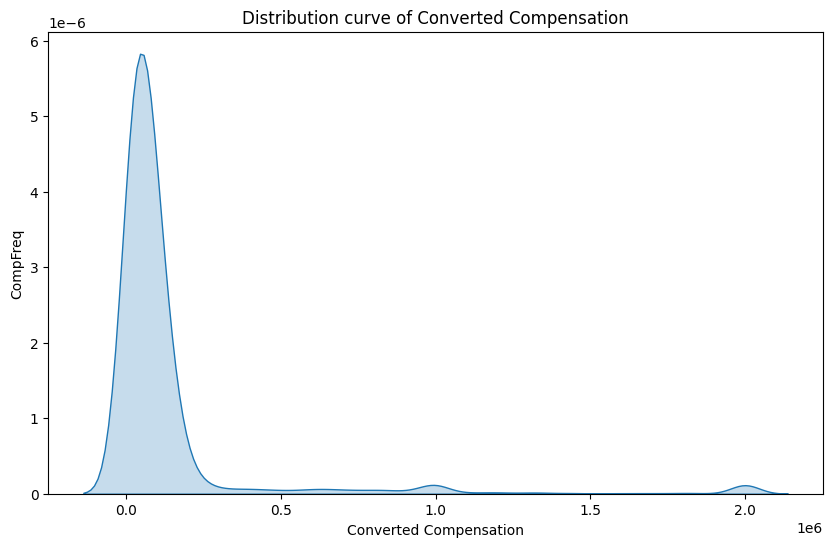

In [4]:
# your code goes here
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="ConvertedComp", fill=True)  # KDE plot
plt.title("Distribution curve of Converted Compensation")
plt.xlabel("Converted Compensation")
plt.ylabel("CompFreq")
plt.show()




Plot the histogram for the column `ConvertedComp`.


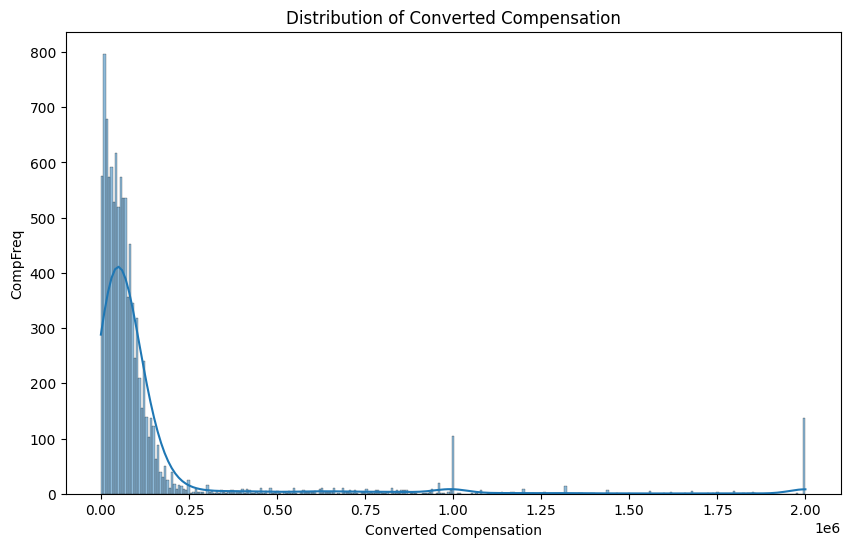

In [5]:
# your code goes here
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="ConvertedComp", kde=True)  # Using Seaborn for a histogram with KDE (Kernel Density Estimation)
plt.title("Distribution of Converted Compensation")
plt.xlabel("Converted Compensation")
plt.ylabel("CompFreq")
plt.show()

What is the median of the column `ConvertedComp`?


In [6]:
# your code goes here
median_converted_comp = df['ConvertedComp'].median()
print("Median of ConvertedComp is: ", median_converted_comp)



Median of ConvertedComp is:  57745.0


How many responders identified themselves only as a **Man**?


In [7]:
# your code goes here
man_count = df[df['Gender'] == 'Man']['Gender'].count()
print("Number of male respondents:", man_count)


Number of male respondents: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [8]:
# your code goes here
women_df = df[df['Gender'] == 'Woman']
median_women_converted_comp = women_df['ConvertedComp'].median()
print("Median Converted Compensation for Women:", median_women_converted_comp)


Median Converted Compensation for Women: 57708.0


In [9]:
#finding median age of the Survey Respondents
median_age = df['Age'].median()
print("Median Age of Survey Respondents:", median_age)

Median Age of Survey Respondents: 29.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [10]:
# your code goes here
ages = df['Age']

min_age = np.min(ages)
q1_age = np.percentile(ages, 25)
median_age = np.median(ages)
q3_age = np.percentile(ages, 75)
max_age = np.max(ages)

print("Minimum (Min):", min_age)
print("First Quartile (Q1):", q1_age)
print("Median (Q2):", median_age)
print("Third Quartile (Q3):", q3_age)
print("Maximum (Max):", max_age)




Minimum (Min): 16.0
First Quartile (Q1): nan
Median (Q2): nan
Third Quartile (Q3): nan
Maximum (Max): 99.0


Plot a histogram of the column `Age`.


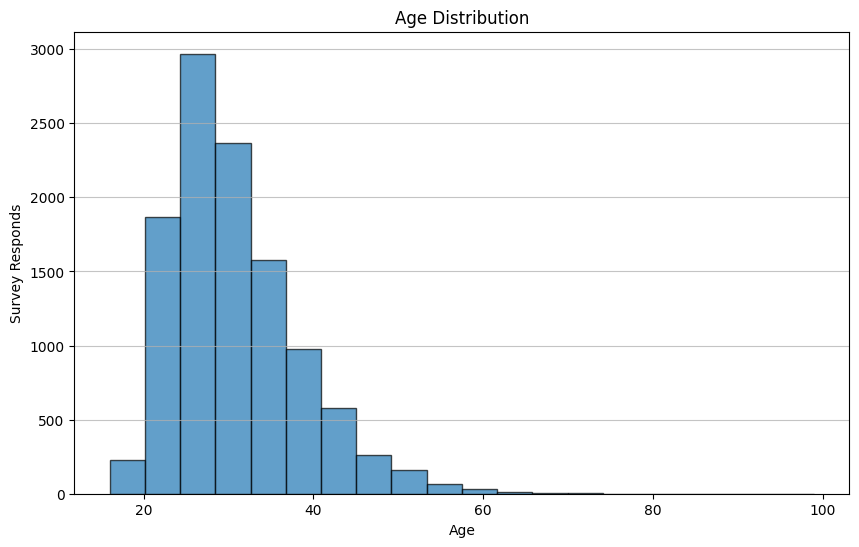

In [11]:
# your code goes here
plt.figure(figsize=(10, 6))
plt.hist(ages, bins=20, edgecolor='k', alpha=0.7) 
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Survey Responds")
plt.grid(axis='y', alpha=0.75)

plt.show()



## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


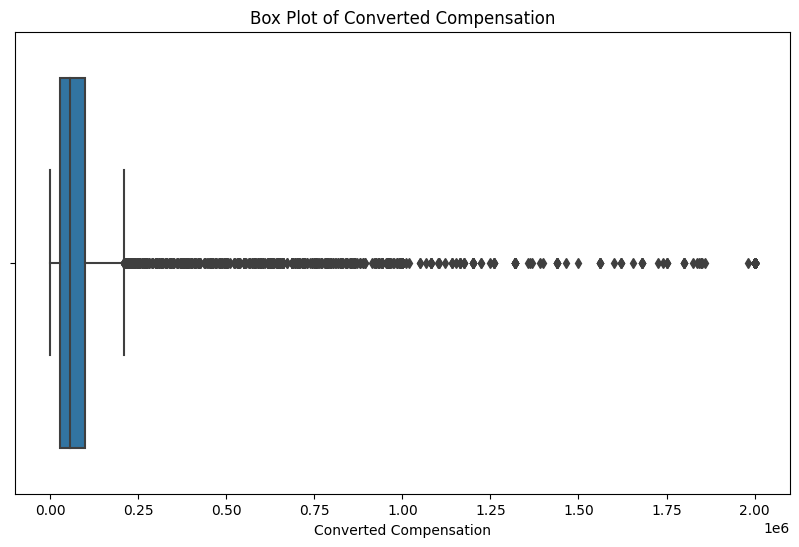

In [18]:
# your code goes here
converted_comp_data = df['ConvertedComp']

plt.figure(figsize=(10, 6))
sns.boxplot(x=converted_comp_data)
plt.title("Box Plot of Converted Compensation")
plt.xlabel("Converted Compensation")
plt.show()



Find out the Inter Quartile Range for the column `ConvertedComp`.


In [29]:
# your code goes here
converted_comp_data = df['ConvertedComp']
# Droping missing values (if any) from the column
converted_comp_data = converted_comp_data.dropna()
# Checking if there is any data remaining in the column
if len(converted_comp_data) == 0:
    print("No valid data in the 'ConvertedComp' column.")
else:
    q1 = np.percentile(converted_comp_data, 25)
    q3 = np.percentile(converted_comp_data, 75)
    
    iqr = q3 - q1
    
    print("First Quartile (Q1):", q1)
    print("Third Quartile (Q3):", q3)
    print("Interquartile Range (IQR):", iqr)




First Quartile (Q1): 26868.0
Third Quartile (Q3): 100000.0
Interquartile Range (IQR): 73132.0


Find out the upper and lower bounds.


In [34]:
# your code goes here
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)



Lower Bound: -82830.0
Upper Bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [38]:
# your code goes here
outliers = (converted_comp_data < lower_bound) | (converted_comp_data > upper_bound)

num_outliers = outliers.sum()

print("Number of outliers in ConvertedComp:", num_outliers)



Number of outliers in ConvertedComp: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [47]:
# your code goes here
filtered_df = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]
print(filtered_df)



       Respondent                      MainBranch Hobbyist  \
0               4  I am a developer by profession       No   
1               9  I am a developer by profession      Yes   
2              13  I am a developer by profession      Yes   
4              17  I am a developer by profession      Yes   
5              19  I am a developer by profession      Yes   
...           ...                             ...      ...   
11392       25134  I am a developer by profession      Yes   
11393       25136  I am a developer by profession      Yes   
11394       25137  I am a developer by profession      Yes   
11395       25138  I am a developer by profession      Yes   
11396       25141  I am a developer by profession      Yes   

                                             OpenSourcer  \
0                                                  Never   
1                             Once a month or more often   
2      Less than once a month but more than once per ...   
4      Less tha

In [52]:
# Find the median for the 'ConvertedComp' column in the filtered_df
median_converted_comp = filtered_df['ConvertedComp'].median()

print("Median Converted Compensation in filtered_df:", median_converted_comp)

# Find the mean for the 'ConvertedComp' column in the filtered_df
mean_converted_comp = filtered_df['ConvertedComp'].mean()

print("Mean Converted Compensation in filtered_df:", mean_converted_comp)


Median Converted Compensation in filtered_df: 52704.0
Mean Converted Compensation in filtered_df: 59883.20838915799


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [53]:
# your code goes here
correlation_matrix = df.corr()

age_correlation = correlation_matrix['Age']

print(age_correlation)



Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


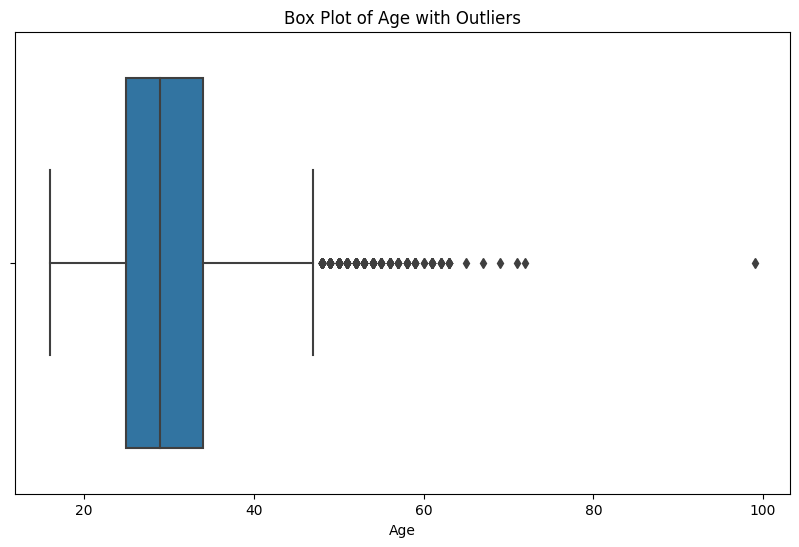

In [54]:
# Assuming 'filtered_df' is your DataFrame and 'Age' is the column of interest
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_df['Age'], showfliers=True)  # showfliers=True displays the outliers
plt.title("Box Plot of Age with Outliers")
plt.xlabel("Age")
plt.show()


In [55]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Extract the correlations of "Age" with all other columns
age_correlations = correlation_matrix['Age']

# Filter for negative correlations
negative_correlations = age_correlations[age_correlations < 0]

print("Negative Correlations with Age:")
print(negative_correlations)


Negative Correlations with Age:
CodeRevHrs   -0.020469
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
